# Relatório de Análise VIII

## Identificando e Removendo Outliers 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [5]:
dados = pd.read_csv("dados/aluguel_residencial.csv", sep = ";")
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<Axes: >

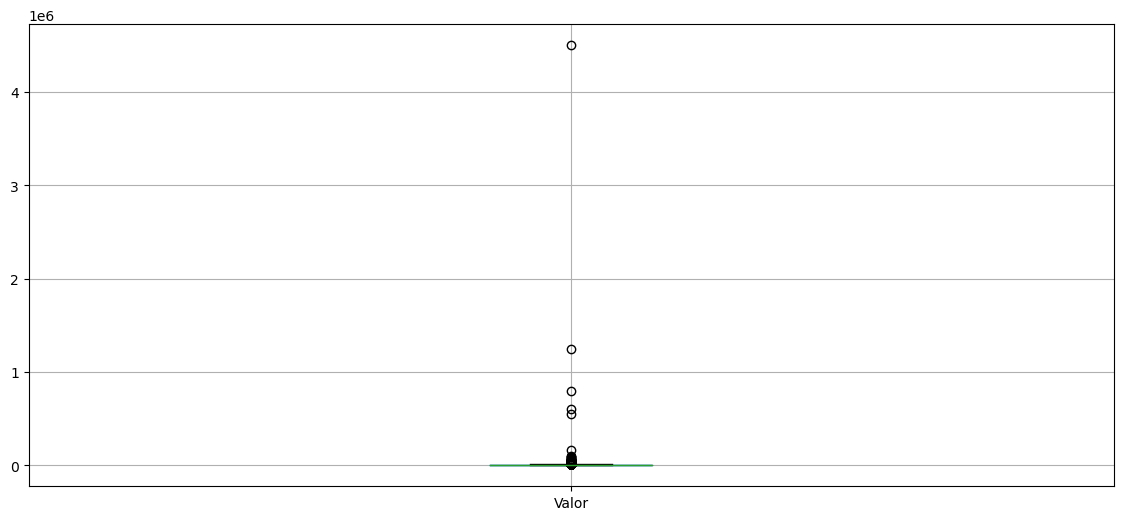

In [25]:
# Visualizando que há dados discrepantes
dados.boxplot(['Valor'])

In [7]:
# Criando uma seleção para ter uma visão mais clara dos dados
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [8]:
# Criando uma series
valor = dados['Valor']

In [26]:
# Calculando o primeiro quartil, terceiro quartil e o intervalo interquatílico IIQ
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
# Selecionando dados que estão apenas dentro desses dois limites
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

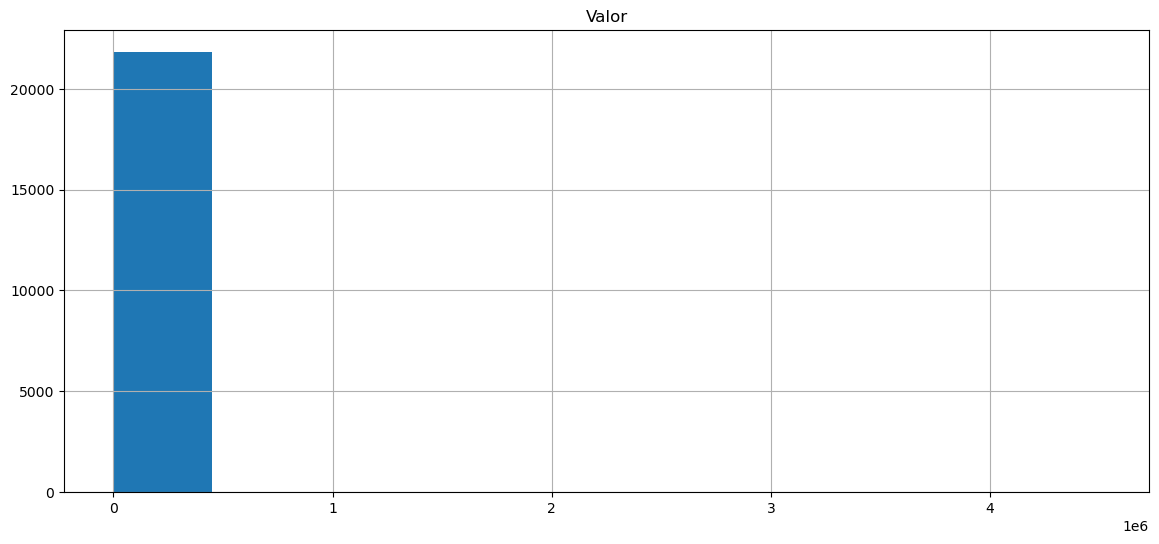

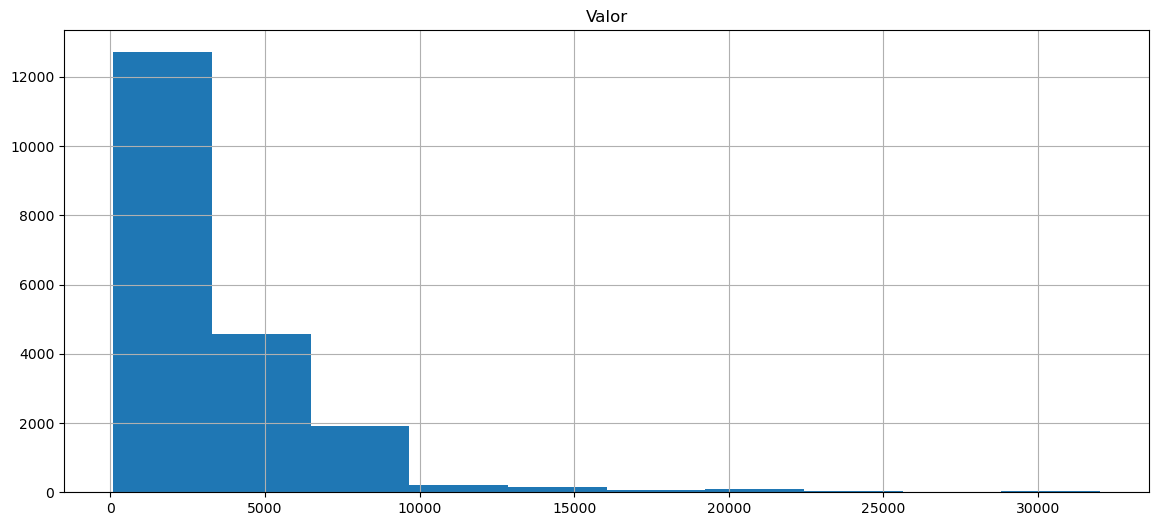

In [27]:
# Gerando visualizações com histograma 
dados.hist(['Valor'])
dados_new.hist(['Valor'])

### Identificando e Removendo Outliers por Grupo (Continuação)

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

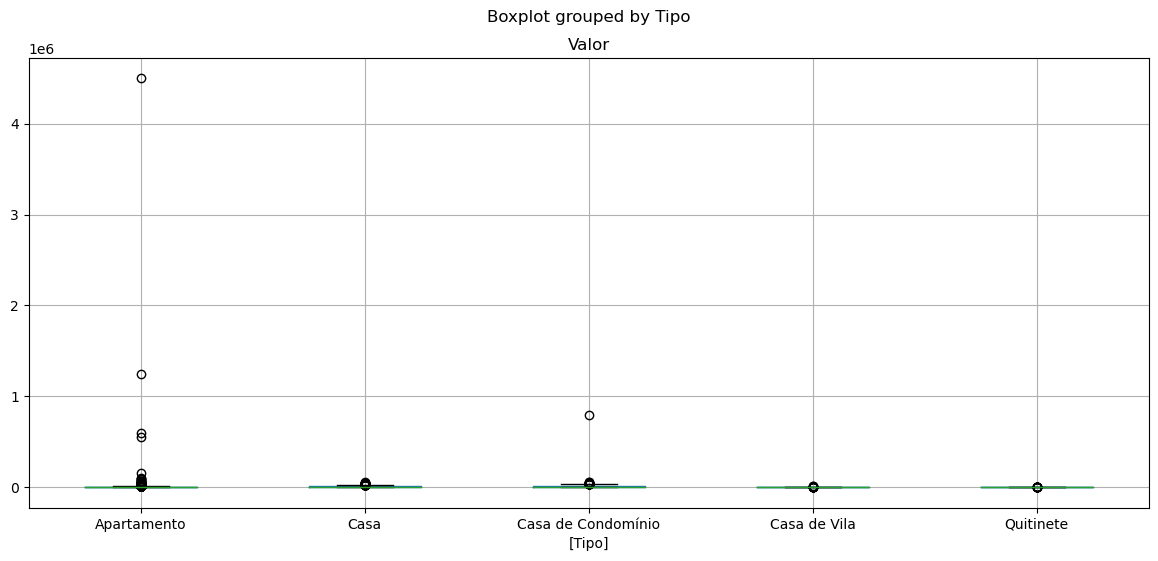

In [28]:
#Identificando dados discrepantes por tipo de imóvel
dados.boxplot(['Valor'], by = ['Tipo'])

In [16]:
grupo_tipo = dados.groupby('Tipo')

In [17]:
# Mudando o tipo DataFrameGroupy prara Series
grupo_tipo = dados.groupby('Tipo')['Valor']

In [18]:
#Criando estatísticas novamente
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [19]:
#Acessando o limite superior de um imóvel
limite_superior['Apartamento']

9950.0

In [20]:
# Criando uma seleção para identificar os dados discrepantes de acordo com os tipos de apartamento
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [21]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [22]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

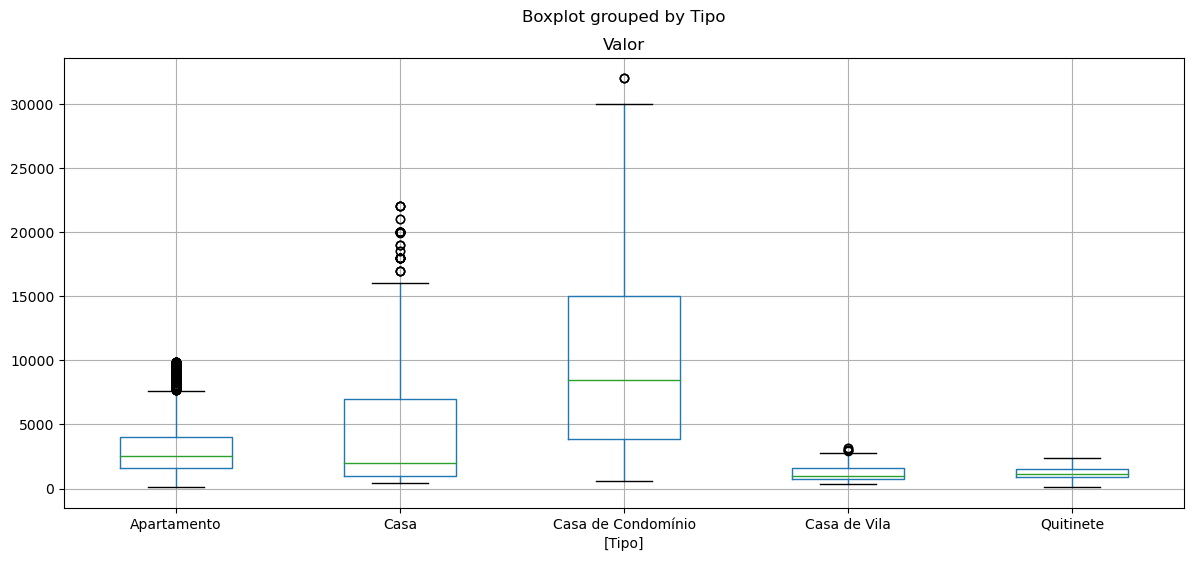

In [23]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [24]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)